#### Sequential Learning App for Materials Discovery - *SLAMD*

In [1]:
#Imports
from ipywidgets import Text,BoundedFloatText,Checkbox,ToggleButtons,Dropdown,VBox,HBox,Accordion,BoundedIntText,SelectMultiple,RadioButtons,FloatRangeSlider,Button,IntSlider,Label,Tab,Output,FileUpload,Layout,FloatSlider
from IPython.display import display,Markdown,HTML
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance_matrix
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as SKRFR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn import preprocessing
from lolopy.learners import RandomForestRegressor
from operator import add

In [2]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   

In [3]:
#Tab
tab =Tab() 

In [4]:
#Outputs
out=Output()
out_plotting=Output()
out_settings=Output()
out_algo=Output()
out_perform_experiment=Output()
out_input_space=Output()
out_res=Output()
out_iter_aut=Output()
out_fixed_targets=Output()

In [5]:
#File Upload
up = FileUpload(accept="", multiple=False)

In [6]:
#Upload Properties 
delim =RadioButtons(
    options=[';', ','],
    description='Separator: ',
    disabled=False)
delim_dec = RadioButtons(
    options=[',', '.'],
    description='Decimal Delim: ',
    disabled=False)
eraser = SelectMultiple(
    options=['tab','"',"%"],
    value=['tab'],
    #rows=10,
    description='Eraser: ',
    disabled=False)
rows = IntSlider(
    value=0,
    step=1,
    description='# of lines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

In [7]:
#Data Info 
toggle = ToggleButtons(
    options=['Preview  ', 'Info  ', 'Stats  '],
    description='Options',
    disabled=False,
    button_style='warning',
    icons=['search', 'info', 'tachometer'])

In [8]:
#Selection of Targets and Features
feature_selector=SelectMultiple(
    options=[],
    description='',
    disabled=False,
    layout=Layout(width='50%')) 
target_selection=SelectMultiple(
    options=[],
    placeholder='Select the Target Variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))
fixed_target_selection=SelectMultiple(
    options=[],
    placeholder='Select the Target Variable',
    description='',
    disabled=False,
    layout=Layout(width='50%'))


In [9]:
#Plotting
selector_plot_variable=SelectMultiple(
    options=[],
    description='Features',
    disabled=False,
    layout=Layout(width='50%'))
graph_type = Dropdown(
    options=['Choose the Graph Type','Scatter', 'Scatter Matrix', 'Correlation Heatmap'],
    value='Choose the Graph Type',
    description='Chart Type:',
    disabled=False,
    layout=Layout(width='50%'))
x_axis = Dropdown(
    options=[''],
    value='',
    description='X-Axis:',
    disabled=False)
y_axis = Dropdown(
    options=[''],
    value='',
    description='Y-Axis:',
    disabled=False)

select_x=Dropdown(
    options=[''],
    value='',
    placeholder='select X-Axis',
    description='X-Axis:',
    disabled=False,
    layout=Layout(width='50%'))

select_y=Dropdown(
    options=[''],
    value='',
    placeholder='select Y-Axis',
    description='Y-Axis:',
    disabled=False,
    layout=Layout(width='50%'))

select_hue=Dropdown(
    options=[''],
    value='',
    placeholder='select the hue',
    description='Hue:',
    disabled=False,
    layout=Layout(width='50%'))

select_size=Dropdown(
    options=[''],
    value='',
    placeholder='select the Size',
    description='Size:',
    disabled=False,
    layout=Layout(width='50%'))






box_targets=VBox([])
box_fixed_targets=VBox([])



In [10]:
#Sequential Learning Properties
select_strategy=Dropdown(
    options=['MEI (exploit)','MU (explore)','MLI (explore & exploit)','MEID (exploit)','MLID (explore & exploit)'],
    value='MEI (exploit)',
    placeholder='select the strategy',
    description='Strategy:',
    disabled=False,
    layout=Layout(width='50%'))

select_model=Dropdown(
    options=['lolo Random Forrest (RF) - quick (requ. min 8 init. samples)','Decision Trees (DT) - quick','Random Forrest (RFscikit) - quick','Gaussian Process Regression (GPR) - quick'],
    value='Decision Trees (DT) - quick',
    placeholder='select the Model',
    description='Model:',
    disabled=False,
    layout=Layout(width='50%'))

In [11]:
#Buttons
button_confirm_strategy=Button(
    description='Confirm Strategy ',
    disabled=False,
    button_style='success',
    tooltip='Confirm selected Strategy',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_upload =Button(
    description='Upload',
    disabled=False,
    button_style='success',
    tooltip='Click to Upload',
    icon='check',
    layout=Layout(width='50%'))

button_preview = Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to Preview',
    icon='search',
    layout=Layout(width='50%'))

button_plot = Button(
    description='Plot',
    disabled=False,
    button_style='warning',
    tooltip='Click to Plot',
    icon='pencil',
    layout=Layout(width='100%'))

button_confirm_feature=Button(
    description='Select Features ',
    disabled=False,
    button_style='success',
    tooltip='Confirm Feature Selection of Training Features',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_confirm_target=Button(
    description='Select Target',
    disabled=False,
    button_style='success',
    tooltip='Confirm the selected Target Variable',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_confirm_fixed_target=Button(
    description='Select fixed Target',
    disabled=False,
    button_style='success',
    tooltip='Confirm the selected Target Variable',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_show_DS=Button(
    description='Visualize Settings',
    disabled=False,
    button_style='success',
    tooltip='Plots Design Space with candidates and targets',
    icon='search',
    layout=Layout(width='50%',height ='inherit'))

button_confirm_plot_var=Button(
    description='Confirm Selection',
    disabled=False,
    button_style='success',
    tooltip='Confirm the selected Target Variable',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))

button_plot_comparision=Button(
    description='Compare',
    disabled=False,
    button_style='warning',
    tooltip='Simplify the Columns',
    icon='fa-bar-chart',
    layout=Layout(width='50%'))

button_confirm_options=Button(
    description='Confirm Options ',
    disabled=False,
    button_style='success',
    tooltip='Confirm options',
    icon='check',
    layout=Layout(width='50%',height ='inherit'))
                           
button_perform_experiment=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform Experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))

run_button_aut=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform Experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))

run_button_aut_template=Button(
    description='Run',
    disabled=False,
    button_style='warning',
    tooltip='Perform Experiment',
    icon='fa-calculator',
    layout=Layout(width='100%'))

confirm_import_button=Button(
    description='Confirm Import ',
    disabled=False,
    button_style='success',
    tooltip='Confirm selected Strategy',
    icon='check',
layout=Layout(width='50%',height ='inherit'))

preview_settings_button=Button(
    description='Preview',
    disabled=False,
    button_style='info',
    tooltip='Click to Preview',
    icon='search',
layout=Layout(width='50%'))

In [12]:
#Layout File Upload Tab

accordion = Accordion(children=[
    up, 
    HBox([delim, delim_dec, eraser]), 
    rows])

accordion.set_title(0, 'File Selection')
accordion.set_title(1, 'Delimiter')
accordion.set_title(2, 'Skip Rows')


accordion_box = VBox([
    accordion, 
    HBox([button_preview, button_upload ]),
    out
])



In [13]:
#Plotting Tab

container_plot_options= VBox([])
button_container=HBox([button_plot])

plotting=VBox(children=[VBox( [
        HBox([graph_type]),
        container_plot_options,
        button_container,
        out_plotting
        ]
)])

In [14]:
#Sequential Learning Tab 

slider_of_for_dist=FloatSlider(
    value=95,
    min=0,
    max=100,
    step=1,
    description='Prediction quantile for distance-based utility (smaller values recommended for weak predictors).:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)

slider_of_for_std=FloatSlider(
    value=1,
    min=0.1,
    max=5,
    step=0.1,
    description='σ Factor (to controll the weigth of uncertainty):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)
quantile_tar_slider= FloatSlider(
    value=95,
    min=1,
    max=100,
    step=1,
    description='Target threshold (Quantile):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)


quantile_sample_slider= FloatSlider(
    value=50,
    min=1,
    max=100,
    step=5,
    description='Sample threshold (Quantile):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    
    layout=Layout(width='50%')
)
initial_sample_size_text=BoundedIntText(
    value=4,
    min=2,
    max=20,
    step=1,
    description='Initial Sample Size:',
    disabled=False,
    layout=Layout(width='50%')
)


box_features_slider=VBox([])


plottingDS=VBox(children=[VBox( [
        
        out_input_space
    ]
)])

DataPre_sl=VBox([
        HBox([Label("Feature"),feature_selector, button_confirm_feature]),
        HBox([Label("Targets"),target_selection, button_confirm_target]),
        box_targets,
        HBox([Label("Fixed Targets"),fixed_target_selection, button_confirm_fixed_target]),
        box_fixed_targets,
        HBox([quantile_tar_slider,quantile_sample_slider]),
        HBox([initial_sample_size_text,button_show_DS]),
        plottingDS    
])


    
DataPre=VBox([
        HBox([feature_selector, button_confirm_feature ]),
        HBox([target_selection, button_confirm_target]),
       ])

iterations=IntSlider(
    value=30,
    min=1,
    max=100,
    step=1,
    description='# of SL runs:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='50%')
)

custom_container=VBox([HBox([])])
results_container=VBox([HBox([])])
strategy_container=HBox([select_strategy, button_confirm_strategy ])

start_and_stop_sl_container=HBox([button_perform_experiment])

sl_settings= VBox([
    strategy_container,
    custom_container,
    HBox([select_model,iterations]),
    start_and_stop_sl_container,
    out_perform_experiment,
    out_fixed_targets
    
])



sl_accordion=Accordion(children=[DataPre_sl,sl_settings])
sl_accordion.set_title(0,"Settings")
sl_accordion.set_title(1,"Sequential Learning Parameters")

In [15]:
#Automation Components

sl_runs_for_sl_arena=BoundedIntText(
    value=5,
    min=0,
    max=100,
    step=1,
    description='SL-Runs:',
    disabled=False
)


checkbox_gp=Checkbox(
    value=False,
    description='Gaussian Process Regression (GPR) - quick',
    disabled=False,
    indent=False
)



checkbox_dt=Checkbox(
    value=False,
    description='Decision Trees (DT) - quick',
    disabled=False,
    indent=False
)
checkbox_rf=Checkbox(
    value=False,
    description='lolo Random Forrest (RF) - quick (requ. min 8 init. samples)',
    disabled=False,
    indent=False
)
checkbox_rf_scikit=Checkbox(
    value=False,
    description='Random Forrest (RFscikit) - quick',
    disabled=False,
    indent=False
)

specify_target_treshhold=Checkbox(
    value=False,
    description='Specify',
    disabled=False,
    indent=False
)

specify_sample_threshold=Checkbox(
    value=False,
    description='Specify',
    disabled=False,
    indent=False
)
specify_sigma=Checkbox(
    value=False,
    description='Specify',
    disabled=False,
    indent=False
)
specify_distance=Checkbox(
    value=False,
    description='Specify',
    disabled=False,
    indent=False
)
specify_init_sample_size=Checkbox(
    value=False,
    description='Specify',
    disabled=False,
    indent=False
)

#refactor idee : Specification class mit checkbox und textfield
all_specify_checkboxes=[specify_target_treshhold,specify_sample_threshold,specify_sigma,specify_distance,specify_init_sample_size]



start_sigma=BoundedFloatText(
    value=1,
    min=0,
    max=10.0,
    step=0.1,
    description='Start:',
    disabled=False
)

stop_sigma=BoundedFloatText(
    value=5,
    min=0,
    max=10.0,
    step=0.1,
    description='Stop:',
    disabled=False
)
step_sigma=BoundedFloatText(
    value=1,
    min=0,
    max=10.0,
    step=0.1,
    description='Step Size:',
    disabled=False
)

start_tar_tresh=BoundedFloatText(
    value=95,
    min=0,
    max=100,
    step=0.5,
    description='Start:',
    disabled=False
)

stop_tar_tresh=BoundedFloatText(
    value=100,
    min=0,
    max=100,
    step=0.5,
    description='Stop:',
    disabled=False
)
step_tar_tresh=BoundedFloatText(
    value=1,
    min=0,
    max=10,
    step=0.5,
    description='Step:',
    disabled=False
)

start_samp_tresh=BoundedFloatText(
    value=50,
    min=0,
    max=100.0,
    step=0.5,
    description='Start:',
    disabled=False
)

stop_samp_tresh=BoundedFloatText(
    value=55,
    min=0,
    max=100.0,
    step=0.5,
    description='Stop:',
    disabled=False
)

step_samp_tresh=BoundedFloatText(
    value=1,
    min=0,
    max=10,
    step=0.5,
    description='Step:',
    disabled=False
)

start_init_samp=BoundedIntText(
    value=2,
    min=1,
    max=100,
    step=1,
    description='Start:',
    disabled=False
)
stop_init_samp=BoundedIntText(
    value=10,
    min=1,
    max=1000,
    step=1,
    description='Stop:',
    disabled=False
)


step_init_samp=BoundedIntText(
    value=1,
    min=1,
    max=100,
    step=1,
    description='Step: ',
    disabled=False
)

#
start_distance=BoundedFloatText(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description='Start:',
    disabled=False
)

stop_distance=BoundedFloatText(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description='Stop:',
    disabled=False
)
step_distance=BoundedFloatText(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description='Step Size:',
    disabled=False
)



    




list_tar_tresh=Text(
    value='',
    placeholder='e.g. 89;92;96',
    description='specified values:',
    disabled=False
)
list_samp_tresh=Text(
    value='',
    placeholder='e.g. 51;67',
    description='specified values:',
    disabled=False
)
list_init_samp=Text(
    value='',
    placeholder='e.g. 2;8;9  ',
    description='specified values:',
    disabled=False
)
list_sigma_factor =Text(
    value='',
    placeholder='e.g. 1;2 ',
    description='specified values:',
    disabled=False
)
list_utility_distance =Text(
    value='',
    placeholder='e.g. 90;95 ',
    description='specified values:',
    disabled=False
)


start_utility_distance=BoundedFloatText(
    value=90,
    min=0,
    max=100,
    step=1,
    description='Start:',
    disabled=False
)

stop_utility_distance=BoundedFloatText(
    value=100,
    min=0,
    max=100,
    step=1,
    description='Stop:',
    disabled=False
)

step_utility_distance=BoundedFloatText(
    value=5,
    min=0,
    max=100,
    step=1,
    description='Step Size:',
    disabled=False
)

In [16]:



all_specify_lists=[list_tar_tresh,list_samp_tresh,list_sigma_factor,list_utility_distance,list_init_samp]



sl_arena=VBox([
        HBox([sl_runs_for_sl_arena]),
        VBox([Label("Initial Sample Size:"),
                        HBox([start_init_samp,step_init_samp,stop_init_samp]),
                        HBox([specify_init_sample_size,list_init_samp])]),
    
        VBox([Label("Target Threshold:"),
                      HBox([start_tar_tresh,step_tar_tresh,stop_tar_tresh]),
                      HBox([specify_target_treshhold,list_tar_tresh]),
                     ]),
        VBox([Label("Sample Threshold:"),
                        HBox([start_samp_tresh,step_samp_tresh,stop_samp_tresh]),
                        HBox([specify_sample_threshold,list_samp_tresh])
                     ]),
        VBox([Label("Utility Distance:"),
                        HBox([start_utility_distance,step_utility_distance,stop_utility_distance]),
                        HBox([ specify_distance,list_utility_distance]),
                     ]),
        VBox([Label("Utility  sigma factor range:"),
                      HBox([start_sigma,step_sigma,stop_sigma]),
                      HBox([specify_sigma,list_sigma_factor]),
                    ]),
        VBox([Label("Models:"),
                      HBox([checkbox_gp,checkbox_dt]),
                      HBox([checkbox_rf,checkbox_rf_scikit])]),
        run_button_aut,
        out_iter_aut
            
])

selection_aut_feature=VBox([HBox([feature_selector, button_confirm_feature]),
        HBox([target_selection, button_confirm_target]),])


import_button = FileUpload(accept="", multiple=False,description="Import",layout=Layout(width='50%'))

   
import_container=VBox([HBox([import_button,preview_settings_button,confirm_import_button,run_button_aut_template]),HBox([out_settings])])

automation_accordion=Accordion(children=[selection_aut_feature,import_container,sl_arena])

automation_accordion.set_title(0, 'Feature and Target Selection')
automation_accordion.set_title(1, 'Import Settings')
automation_accordion.set_title(2, 'Manually Configure Settings')





In [17]:
#Layout Tabs

children = [
    accordion_box, 
    VBox([toggle, out]),
    plotting,
    sl_accordion,
    automation_accordion
    
   ]

tab.children = children

In [18]:
#Naming Tabs

tab.set_title(0, "Upload")
tab.set_title(1, "Data Info")
tab.set_title(2, "Design Space Explorer")
tab.set_title(3, "Sequential Learning")
tab.set_title(4, "Automation 🤖")

In [19]:
#Utility Methods
def extend(list_of_2dms_arrays_to_extend):
    np_array=np.array(list_of_2dms_arrays_to_extend)
    max_cols=max(map(len,np_array))
    result_list=[]
    for i in np_array:
                    if(len(i) == max_cols):
                        result_list.append(i)
                    elif (len(i) != max_cols):
                        how_often=max_cols-len(i)
                        matrix_to_extend=np.tile(i[:][-1], (how_often, 1))
                        i=np.concatenate((i, matrix_to_extend))
                        result_list.append(i)
                    
   
    return result_list

    
           
def flatten_list(nested_list):
    for sublist in nested_list:
        flatlist=[element for element in sublist]  
    return flatlist


def import_settings():
    content= content_parser(import_button)
    settings = pd.read_csv(content, sep=',', index_col=False, decimal='.')
         
    return settings


def content_parser(source):
    if source.value == {}:
        """with out:
            out.clear_output
            display(Markdown('No CSV loaded'))
            #print('No CSV loaded')    """
    else:
        from io import StringIO
        typ, content = "", ""
        up_value = source.value
        for i in up_value.keys():
            typ = up_value[i]["metadata"]["type"]
            if typ == "text/csv" or typ == "application/vnd.ms-excel":
                content = up_value[i]["content"]
                content_str = str(content, 'utf-8')

                if eraser.value != {}: 
                    for val in eraser.value:
                        if val == "tab":
                            content_str = content_str.replace("\t","")
                        elif val =="%":
                            content_str = content_str.replace("\t","")
                        else:
                            content_str = content_str.replace(val,"")
                if content_str != "":
                    str_io = StringIO(content_str) 
                    return str_io
def df_converter():
    content = content_parser(up)
    if content is not None:
            df = pd.read_csv(content, sep=delim.value, index_col=False, skiprows=rows.value,decimal=delim_dec.value)
            df=df.apply(pd.to_numeric,errors="ignore")
            
            
            
                
            return df
    else:
        return None
def preview():
    
    df = df_converter()
    with out:
        out.clear_output()
        display(Markdown('This is your data:'))
        
        if df is not None:
            display(Markdown(df.head(10).to_markdown()))
        else:
            display(Markdown('Configuration is wrong/missing...'))
            
def upload():
    
    df = df_converter()
    with out:
        out.clear_output()
        display(Markdown('This is how your uploaded data looks like:'))
       
        if df is not None:
            display(Markdown(df.head(10).to_markdown()))
            x_axis.options = df.columns
            y_axis.options = df.columns
            feature_selector.options= df.columns
            
            select_x.options=df.columns
            select_y.options=df.columns
            select_size.options=df.columns
            select_hue.options=df.columns
            selector_plot_variable.options=df.columns
            
            
        else:
            display(Markdown('Configuration is wrong/missing...'))

            
            
def create_download_link( df, title, filename): 
    import base64
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = html_buttons = '''<html>
    <head>
    <meta name="viewport" content="width=device-width, initial-scale=1">
    </head>
    <body>
    <a download="{filename}" href="data:text/csv;base64,{payload}" download>
    <button class="p-Widget jupyter-widgets jupyter-button widget-button mod-warning">{title}</button>
    </a>
    </body>
    </html>
    '''
    html_button = html_buttons.format(payload=payload,filename=filename,title=title)
    return HTML(html_button)

            
            
def desc():
    info_level = toggle.value
    if info_level != {}:
        df = df_converter()
        with out:
            out.clear_output()
            
            display(Markdown('\n Data {} \n'.format(
                info_level)))
            if df is not None:
                if info_level == 'Info  ':
                    df.info()
                elif info_level == 'Stats  ':
                    display(Markdown(df.describe().to_markdown()))
                elif info_level == 'Preview  ':
                    display(Markdown(df.head(10).to_markdown()))
                else:
                    display(Markdown('Configuration is wrong/missing...'))
       




    


In [20]:
#Plotting Methods
import seaborn as sns

def plot():
    graph = graph_type.value
    if graph=="Scatter":
        plot_scatter()
    elif graph=="Correlation Heatmap":
            plot_heat()
    elif graph=="Scatter Matrix":
            plot_pairwise()
          
        
def plot_pairwise():
    df =confirm_var()
    with out_plotting:
        out_plotting.clear_output()
        sns.pairplot(df)
        plt.show()

def plot_heat():
    df = confirm_var()
    with out_plotting:
        out_plotting.clear_output()
        corr = df.corr()
        plt.figure(figsize=(12,7))
        sns.heatmap(corr, annot=True, cmap='Blues')
        b, t = plt.ylim()
        plt.ylim(b+0.5, t-0.5)
        plt.title("Feature Correlation Heatmap")
        plt.show()
            
def plot_scatter():
    data=df_converter()
    with out_plotting:
        out_plotting.clear_output()
        fig, ax = plt.subplots(figsize=(12,7))
        #not generic
        sns.scatterplot(y=select_y.value, x=select_x.value, hue=select_hue.value, size=select_size.value, data=data, ax=ax, sizes=(50, 300))
        ax.set_title(select_y.value+ "vs"+ select_x.value)
        ax.legend(loc="upper left", bbox_to_anchor=(1,1))
        plt.show()
        plt.close(fig)  

        
def plot_TSNE_input_space():
            from sklearn.manifold import TSNE
            features_df=(df_converter()[confirm_features()]-df_converter()[confirm_features()].mean())/df_converter()[confirm_features()].std()
        
            target_df=(df_converter()[confirm_target()]-df_converter()[confirm_target()].mean())/df_converter()[confirm_target()].std()       

            tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
            tsne_results = tsne.fit_transform(features_df)

            with out_input_space:
                # Plot Results in reduced FS
                out_input_space.clear_output(wait=True)
                fig3= plt.figure(figsize=(10, 6))
                targ_q = quantile_tar_slider.value/100
                samp_q = quantile_sample_slider.value/100
                sum_ = target_df.sum(axis=1).to_frame()
                targ_q_t= sum_.quantile(targ_q)
                samp_q_t=sum_.quantile(samp_q)
                
                cmap = plt.get_cmap('cool', 200)
                cmap.set_under('dimgray') 
                cmap.set_over('lawngreen')
                sc=plt.scatter(x=tsne_results[:,0],y=tsne_results[:,1], c=sum_, cmap=cmap, vmin=samp_q_t.values, vmax=targ_q_t.values-0.01)
                cbar=plt.colorbar(sc,extend='both')
                #ticklabs = cbar.ax.get_yticklabels()
                cbar.ax.set_yticklabels([ ]) 
                cbar.ax.set_ylabel('targets (green)                to be explored            initial candidate pool (gray)', rotation=270 ,va='center')

                plt.title("Design space in TSNE-coordinates: candidate pool and targets")
                plt.show()
                        
                plt.close(fig3)

In [21]:

def confirm_options():
    items=box_features_slider.children
    df = df_converter()
    Y = df.loc[:,df.columns.isin(target_selection.value)]
    
    for slider in items:
            unt_grenz= slider.value[0]/100
            ob_grenz= slider.value[1]/100
            Y = Y[(Y >= Y.quantile(unt_grenz) ) & (Y <= Y.quantile(ob_grenz))]
            Y= Y.dropna()
    
    return Y   


def confirm_features():
    df = df_converter()
    train = feature_selector.value
    target_selection.options=df.columns[~df.columns.isin(feature_selector.value)]
    fixed_target_selection.options=target_selection.options
    train = df.columns[df.columns.isin(feature_selector.value)]
    return train


def confirm_var():
    df= df_converter()
    selection = list(selector_plot_variable.value)
    var = df[selection]
 
    return var

  
def confirm_target():
    
    df = df_converter()
    target = df.columns[df.columns.isin(target_selection.value)]
    if(len(box_targets.children) == 0):
        
        create_dynamically_checkboxes(target_selection.value,box_targets)
    return target 

def confirm_fixed_target():
    df = df_converter()
    
    fixed_target = df.columns[df.columns.isin(fixed_target_selection.value)]
    create_dynamically_checkboxes(fixed_target_selection.value,box_fixed_targets)
    
    return fixed_target

def confirm_strategy():
    strategy= select_strategy.value
    if strategy != {}:
            custom_container.children=[]
            return select_strategy.value


In [22]:
def create_slider_for_dist_quantile():
    strategy_container.children=[select_strategy,slider_of_for_dist,  button_confirm_strategy]
    
def create_slider_for_dist_quantile_std():
    strategy_container.children=[select_strategy,slider_of_for_dist, slider_of_for_std,  button_confirm_strategy]
        
def create_slider_for_std():
    strategy_container.children=[select_strategy,slider_of_for_std,  button_confirm_strategy]
    
def create_dynamically_checkboxes(targets,output):
    items = [RadioButtons(
    options=['maximize', 'minimize'],
    value='maximize', 
    description=feature,
    disabled=False
    )
    for feature in targets]
    output.children=items
    
   
    


In [23]:
result_df = pd.DataFrame(columns=['Requ. experiments (mean)','Requ. experiments (std)','Requ. experiments (90%)',
                                  'Requ. experiments (max)','Algorithm','Utlity Function','σ Factor',
                                  'qant. (distance utility)','# SL runs','Initial Sample','# of samples in the DS',
                                  '# Features','# Targets', 'Target threshold','Sample threshold','Features name','Targets name',
                                  'Req. experiments (all)'])



In [24]:
class sequential_learning:
    
    xlabel="Sequential Learning Iteration"
    dataframe = df_converter()
    features_df=df_converter()
    target_df=df_converter()
    min_distances_list=[]
    y_pred_dtr_mean=None
    y_pred_dtr_std=None
    y_pred_dtr=None
    SampIdx=None
    PredIdx=None
    count=0
    index_sum_randomized=None
    rand_tars=[]
    rand_fixed_tars=[]
   
        
    def __init__(self,dataframe,init_sample_size,target_treshhold,number_of_executions,sample_treshold,sigma,distance,model,strategy):  #constructor
        self.dataframe= dataframe
        self.init_sample_size=init_sample_size
        self.target_treshhold = target_treshhold/100
        self.sample_treshold=sample_treshold/100
        self.number_of_executions=number_of_executions
        self.tries_list=np.empty(number_of_executions)
        self.tries_list_rand_pick=np.empty(number_of_executions)
        self.sigma=sigma
        self.distance=distance
        self.model=model
        self.strategy = strategy
        
        
    def apply_feature_selection_to_df(self,dataframe):
        self.features_df = self.dataframe[confirm_features()]    
    
    def apply_target_selection_to_df(self,dataframe):
        self.target_df= self.dataframe[confirm_target()]    


    #self werte return macht wenig sinn
    def standardize_data(self):
        dataframe_norm=(self.dataframe-self.dataframe.mean())/self.dataframe.std()
        target_df_norm=(self.target_df-self.target_df.mean())/self.target_df.std()
        features_df_norm=(self.features_df-self.features_df.mean())/self.features_df.std()
        self.features_df=features_df_norm
        self.target_df=target_df_norm
        self.dataframe=dataframe_norm
        return self.features_df, self.target_df, self.dataframe
        


    def init_sampling(self):
        targets = confirm_target()
        fixed_targets=confirm_fixed_target()
        sum_ = self.dataframe[targets].sum(axis=1).to_frame()+self.dataframe[fixed_targets].sum(axis=1).to_frame()
        samp_q_t=sum_.quantile(self.sample_treshold)
        Index_label=np.where(sum_ < samp_q_t )
        Index_label=Index_label[0]
        init_sample_set = np.ones((0,self.init_sample_size))
        
        for i in range(self.number_of_executions):
                    
                    init_sample_set=np.vstack([init_sample_set, random.choice(Index_label,self.init_sample_size)])
       
        return init_sample_set
    
    def decide_max_or_min(self,source,columns):
        max_or_min_optimizations_list=[source.children[decide].value for decide in range(len(columns))]
        for goal in max_or_min_optimizations_list:
                        index_of_target = max_or_min_optimizations_list.index(goal)
                        if (goal == "minimize"): 
                            self.target_df[columns].iloc[:,index_of_target]*(-1)
        
            
    def start_sequential_learning(self):
            self.tries_list=np.empty(self.number_of_executions)
            self.tries_list.fill(np.nan)
            self.tries_list_rand_pick=np.empty(self.number_of_executions)
            self.tries_list_rand_pick.fill(np.nan)
            self.count=0
            distances=[]
            targt_perfs=[]
            
            fixed_targets=[]
            targets=[]
            
            current_distances_list=[]   
            current_targt_perf_list=[]
            
            
            with out_perform_experiment:
                    display(Markdown('Sequential Learning is running...'))

            init_sample_set=self.init_sampling()
            global result_df     
            for i in range(self.number_of_executions):
                    
                    self.perform_random_pick(i)
                    self.SampIdx=init_sample_set[i].astype(int)
                    self.PredIdx=self.dataframe
                    self.PredIdx = self.PredIdx.drop(self.PredIdx.index[self.SampIdx]).index
                    self.decide_model(self.model)
                    self.tries_list[i]=self.init_sample_size
                    
                    decide_optimization=self.decide_max_or_min(box_targets,confirm_target())
                    decide_optimization=self.decide_max_or_min(box_fixed_targets,confirm_fixed_target())

                    fixed_targets_index=confirm_fixed_target()
                    
                    
                    sum_ = self.dataframe[confirm_target()].sum(axis=1).to_frame()+self.dataframe[fixed_targets_index].sum(axis=1).to_frame()
                    
                    targ_q_t= sum_.quantile(self.target_treshhold) 
                    schwellwert=sum_.quantile(self.target_treshhold)
                    Index_c=np.where(sum_ >= schwellwert )
                    Index_c=Index_c[0]
                    distance=distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_c])
                    distance=distance.min()
                    current_distances_list=[distance]
                    
                    #max value summe
                    
                    targt_perf=sum_.loc[self.SampIdx].max().values
                    current_targt_perf_list=[targt_perf] 

                    max_targt_perf_index=np.argmax(sum_.loc[self.SampIdx].values, axis=0)
                    Idx_of_best_value=self.SampIdx[max_targt_perf_index]
                    best_value=df_converter().iloc[Idx_of_best_value]
                    
                    
                    current_fixed_target_list=np.array(best_value[confirm_fixed_target()].to_numpy()[0])
                    current_prediction_target=np.array(best_value[confirm_target()].to_numpy()[0])
                    
                    
                    while sum_.loc[self.SampIdx].max().values < targ_q_t.values:
                                    
                                    self.update_strategy(self.strategy)

                                    #Train Model
                                    self.decide_model(self.model)

                                    schwellwert=sum_.quantile(self.target_treshhold)
                                    Index_c=np.where(sum_ >= schwellwert )
                                    Index_c=Index_c[0]

                                    distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_c])
                                    distance=distance.min()
                                    current_distances_list.append(distance)

                                    targt_perf=sum_.loc[self.SampIdx].max().values.tolist()
                                    targt_perf=max(targt_perf)
                                    
                                   
                                    current_targt_perf_list.append(targt_perf)
                                    
                                    
                                    max_targt_perf_index=np.argmax(sum_.loc[self.SampIdx].values, axis=0)
                                    Idx_of_best_value=self.SampIdx[max_targt_perf_index]
                                    best_value=df_converter().iloc[Idx_of_best_value]
                                    
                                    current_prediction_target=np.vstack([current_prediction_target,best_value[confirm_target()].to_numpy()[0]])
                                    current_fixed_target_list=np.vstack([current_fixed_target_list,best_value[confirm_fixed_target()].to_numpy()[0]])
                                    
                                    
                                    self.tries_list[i]=self.tries_list[i]+1   

                    distances.append(current_distances_list)
                    targt_perfs.append(current_targt_perf_list)
                    fixed_targets.append(current_fixed_target_list)
                    targets.append(current_prediction_target)
                    
                    
                    
                    

                ##Distance Plot
                
                    with out_perform_experiment:
                        fig1,axs = plt.subplots(1,2,figsize=(15, 6))
                        axs[0].set_title('Progress per iteration in the input space')
                        axs[0].set_xlabel('SL iterations')
                        axs[0].set_ylabel("Minimum distance from sampled data to target")
                        axs[0].axhline(y=0, color='k', linestyle=':',label='Target')
                        axs[0].legend()

                        axs[1].set_title('Progress per iteration in the output space')
                        axs[1].set_xlabel('SL iterations')
                        axs[1].set_ylabel("Maximum sampled property")
                        axs[1].axhline(y=targ_q_t.values, color='k', linestyle=':',label='Target (normalized)')
                        axs[1].legend()

                        #Exten values of perfs
                        lengths_of_perfs=[]
                        for runs in range(len(targt_perfs)):
                                        current_len_of_perf=len(targt_perfs[runs])
                                        lengths_of_perfs.append(current_len_of_perf)

                        for runs in range(len(targt_perfs)):
                                if(len(targt_perfs[runs])!=max(lengths_of_perfs)):
                                    size_of_values_to_add =max(lengths_of_perfs)-len(targt_perfs[runs])
                                    targt_perfs[runs].extend(np.full(size_of_values_to_add, max(targt_perfs[runs])))


                        #Plotting
                        for runs in range(len(distances)):
                            axs[0].plot(distances[runs],linewidth=8, alpha=0.4)

                    for runs in range(len(targt_perfs)):
                        #print(" type targ perfs",type(targt_perfs[runs]))
                        axs[1].plot(targt_perfs[runs],linewidth=8, alpha=0.4)
                        #plt.close(fig1)

                        
                    with out_perform_experiment:
                            out_perform_experiment.clear_output(wait=True)
                            time.sleep(1.0)
                            fig2=plt.figure(figsize=(15, 5))
                            plt.xlabel('Number of required Experiments')
                            plt.ylabel("Frequency")
                            plt.title("Performance histogram for %s with strategy %s "%(self.model,self.strategy))
                            #plt.hist([self.tries_list,self.tries_list_rand_pick],bins=len(self.tries_list),label=['SL Tries', 'Random Pick Tries'])         
                            plt.hist([self.tries_list_rand_pick],range=(1, len(self.features_df)),label=['Random Process'],alpha=0.4)         
                            plt.hist([self.tries_list],label=['SL'],range=(1, len(self.features_df)),alpha=0.4)         
                            plt.legend()

                            plt.show()
                            #plt.close(fig2)


            if self.strategy=='MEI (exploit)':
                self.sigma=0
                self.distance=0
            elif self.strategy=='MU (explore)':
                self.sigma=1
                self.distance=0
            elif self.strategy=='MLI (explore & exploit)':
                self.distance=0
            elif self.strategy=='MEID (exploit)':
                self.sigma=0
            
                
            ##Appending Performance intensiv --> List comprehension
            to_append=([np.mean(self.tries_list),np.std(self.tries_list),np.quantile(self.tries_list,0.90),
                        np.quantile(self.tries_list,1),self.model, self.strategy,self.sigma,self.distance,
                        self.number_of_executions,self.init_sample_size,len(self.dataframe.index),len(confirm_features()),
                        len(confirm_target()),self.target_treshhold,self.sample_treshold,
                    
                        
                        confirm_features().tolist(),confirm_target().tolist(),self.tries_list])

###SL-PLOT
            with out_fixed_targets: 
                
                
                
                            
                            
                anzahl_plots=len(fixed_target_selection.value)
                fig3,axs_fixed = plt.subplots(anzahl_plots,figsize=(5*anzahl_plots,10),squeeze=False)
                axs_fixed=axs_fixed.flatten()
                fixed_targets_extended=extend(fixed_targets)
                
                
                
                #plot
                for fixed_target in range(anzahl_plots):
                            axs_fixed[fixed_target].set_title('Progress per iteration in the output space for %s'%(confirm_fixed_target()[fixed_target]))
                            axs_fixed[fixed_target].set_xlabel('SL iterations')
                            axs_fixed[fixed_target].set_ylabel("Maximum sampled property")

                
                for sl_run in range(len(fixed_targets_extended)):
                            for one_tar in range(anzahl_plots):
                                        axs_fixed[one_tar].plot(fixed_targets_extended[sl_run][:,one_tar],linewidth=10/anzahl_plots, alpha=0.4)
                                        
                                    
                                    
                anzahl_plots=len(target_selection.value)
                fig4,axs_pred = plt.subplots(anzahl_plots,figsize=(5*anzahl_plots,10), squeeze=False)
                axs_pred=axs_pred.flatten()
                targets_extended=extend(targets)
                
                
                
                for pred_target in range(anzahl_plots):
                            axs_pred[pred_target].set_title('Progress per iteration in the output space for %s'%(confirm_target()[pred_target]))
                            axs_pred[pred_target].set_xlabel('SL iterations')
                            axs_pred[pred_target].set_ylabel("Maximum sampled property")


                for sl_run in range(len(targets)):                            
                            for one_tar in range(anzahl_plots):
                                        axs_pred[one_tar].plot(targets_extended[sl_run][:,one_tar],linewidth=10/anzahl_plots, alpha=0.4)

                                
                                
                                
                                
                                
                                
###SL-PLOT                                
            with out_fixed_targets: 
                            
                anzahl_plots=len(fixed_target_selection.value)
                fig3,axs_fixed = plt.subplots(anzahl_plots,figsize=(5*anzahl_plots,10),squeeze=False)
                axs_fixed=axs_fixed.flatten()
                fixed_targets_extended=extend(self.rand_fixed_tars)
                
                
                #plot
                for fixed_target in range(anzahl_plots):
                            axs_fixed[fixed_target].set_title('Progress per iteration in the output space for %s'%(confirm_fixed_target()[fixed_target]))
                            axs_fixed[fixed_target].set_xlabel('SL iterations')
                            axs_fixed[fixed_target].set_ylabel("Maximum sampled property")

                
                for sl_run in range(len(fixed_targets_extended)):
                            for one_tar in range(anzahl_plots):
                                        axs_fixed[one_tar].plot(fixed_targets_extended[sl_run][:,one_tar],linewidth=10/anzahl_plots, alpha=0.4)
                                        
                                    
                                    
                anzahl_plots=len(target_selection.value)
                fig4,axs_pred = plt.subplots(anzahl_plots,figsize=(5*anzahl_plots,10), squeeze=False)
                axs_pred=axs_pred.flatten()
                targets_extended=extend(self.rand_tars)
                
                for pred_target in range(anzahl_plots):
                            axs_pred[pred_target].set_title('Progress per iteration in the output space for %s'%(confirm_target()[pred_target]))
                            axs_pred[pred_target].set_xlabel('SL iterations')
                            axs_pred[pred_target].set_ylabel("Maximum sampled property")


                for sl_run in range(len(targets)):                            
                            for one_tar in range(anzahl_plots):
                                  axs_pred[one_tar].plot(targets_extended[sl_run][:,one_tar],linewidth=10/anzahl_plots, alpha=0.4)                   
                                
                                
                                
                                
                                
                                
                                
                                
            

            a_series = pd.Series(to_append, index = result_df.columns)
            result_df= result_df.append(a_series, ignore_index=True)
            ###a
            with out_perform_experiment:
                        display(Markdown('Sequential Learning performed ✅'))
                        display(Markdown(" "))
                        display(Markdown('#### Performance SL vs. RP:'))
                        display(Markdown('requ. experiments SL (mean):  {} '.format(
                        np.mean(self.tries_list))))
                        display(Markdown("requ. experiments SL (90%): {}".format(np.quantile(self.tries_list,0.90))))
                        display(Markdown("requ. experiments RP (mean): {}".format(np.mean(self.tries_list_rand_pick))))
                        display(Markdown("requ. experiments RP (90%): {}".format(np.quantile(self.tries_list_rand_pick,0.90))))
                        display(Markdown("SL - complete list of requ. experiments in each iteration: {}".format(self.tries_list)))
                        display(Markdown("RP - complete list of requ. experiments in each iteration: {}".format(self.tries_list_rand_pick)))
                        display(Markdown(" "))
                        display(Markdown(" "))
                        display(Markdown('#### History:'))
                        display(Markdown(" ") )
    
    
            with out_perform_experiment:
                        display(Markdown(result_df.to_markdown()))
                        display((create_download_link(result_df,'Download History','results_sl')))
            
            
                           
    def perform_random_pick(self,acutal_iter):
        sum_ = self.dataframe[confirm_target()].sum(axis=1).to_frame()+self.dataframe[confirm_fixed_target()].sum(axis=1).to_frame()
        index_sum=sum_.index.to_numpy()
        index_sum_randomized=np.random.choice(index_sum,len(index_sum),False)
        targ_q_t= sum_.quantile(self.target_treshhold)
        self.tries_list_rand_pick[acutal_iter]=1

        
        run=0
        
        best_value=df_converter().iloc[index_sum_randomized[run]]
        
        current_fixed_rand_tars=np.array(best_value[confirm_fixed_target()].to_numpy())
        current_pred_rand_tars=np.array(best_value[confirm_target()].to_numpy())
        
        
        
        while sum_.iloc[index_sum_randomized[run]].values[0].astype(float).item() < targ_q_t.item():
            self.tries_list_rand_pick[acutal_iter]=self.tries_list_rand_pick[acutal_iter]+1 
            
            best_value=df_converter().iloc[index_sum_randomized[run]]
            current_pred_rand_tars=np.vstack([current_pred_rand_tars,best_value[confirm_target()].to_numpy()])
            current_fixed_rand_tars=np.vstack([current_fixed_rand_tars,best_value[confirm_fixed_target()].to_numpy()])
            run=run+1
        
        self.rand_fixed_tars.append(current_fixed_rand_tars)
        self.rand_tars.append(current_pred_rand_tars)
        
        
        
    #Refactor idee: Model klasse mit name und checkbox description
    def decide_model(self,model):
        if model== 'lolo Random Forrest (RF) - quick (requ. min 8 init. samples)':
                    Expected_Pred, Uncertainty=  self.fit_RF_wJK()
        elif model == 'Decision Trees (DT) - quick':
                    Expected_Pred, Uncertainty =  self.fit_DT_wJK()
        elif model == 'Random Forrest (RFscikit) - quick':
                    Expected_Pred, Uncertainty =  self.fit_TE_wJK()
        elif model == 'Gaussian Process Regression (GPR) - quick':
                    Expected_Pred, Uncertainty =  self.fit_GP()
                    
            
    def update_strategy(self, strategy):
        if strategy=='MEI (exploit)':
            self.updateIndexMEI()
        elif strategy=='MU (explore)':
            self.updateIndexMU()
        elif strategy=='MLI (explore & exploit)':
            self.updateIndexMLI()
        elif strategy=='MEID (exploit)':
            self.updateIndexMEID()        
        elif strategy=='MLID (explore & exploit)':
            self.updateIndexMLID()
        
    
    def updateIndexMEI(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target()].iloc[self.PredIdx].sum(axis=1).to_frame()
            index_max = np.argmax(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze())
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.PredIdx=new_PredIdx
            
            
    def updateIndexMEID(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target()].iloc[self.PredIdx].sum(axis=1).to_frame()
            schwellwert=np.quantile(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze(),self.distance/100)
            Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()>=schwellwert )
            Index_=Index_[0]
            distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
            min_distances=distance.min(0)
            result = np.where(distance == min_distances.max())
            
            # zip the 2 arrays to get the exact coordinates
            listOfCordinates = list(zip(result[0], result[1]))    
            index_max=Index_[result[1]]
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.PredIdx=new_PredIdx

 

    def updateIndexMLID(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target()].iloc[self.PredIdx].sum(axis=1).to_frame()
            schwellwert=np.quantile((fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()),self.distance/100)
            Index_=np.where(fixed_targets_in_prediction.squeeze()+self.Expected_Pred.squeeze()+self.sigma*self.Uncertainty.squeeze()>=schwellwert )
            Index_=Index_[0]
            distance= distance_matrix(self.dataframe.loc[self.SampIdx],self.dataframe.iloc[Index_])
            min_distances=distance.min(0)
            result = np.where(distance == min_distances.max())
            # zip the 2 arrays to get the exact coordinates
            listOfCordinates = list(zip(result[0], result[1]))    
            index_max=Index_[result[1]]
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.PredIdx=new_PredIdx              
            
            
    def updateIndexMU(self):
            index_max = np.argmax(self.Uncertainty)
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.PredIdx=new_PredIdx
            
            
    def updateIndexMLI(self):
            fixed_targets_in_prediction=self.dataframe[confirm_fixed_target()].iloc[self.PredIdx].sum(axis=1).to_frame()
            index_max = np.argmax(self.Expected_Pred+self.sigma*self.Uncertainty+fixed_targets_in_prediction.squeeze())    
            new_SampIdx=np.append(self.SampIdx,self.PredIdx[index_max])
            self.SampIdx=new_SampIdx
            new_PredIdx = np.delete(self.PredIdx, index_max)
            self.PredIdx=new_PredIdx
                        
            
    def fit_DT_wJK(self):        
        td,tl=self.jk_resampling()
        self.y_pred_dtr=[]
        for i in range(len(td)):
            dtr = DecisionTreeRegressor()
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
        
       
        #quick bug fix
        if(self.strategy=="MEID (exploit)"):
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
            self.Uncertainty = self.y_pred_dtr.std(axis=0)
        elif(self.strategy=="MLID (explore & exploit)"):
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
            self.Uncertainty = self.y_pred_dtr.std(axis=0)
        else:
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.y_pred_dtr=self.y_pred_dtr.T
            self.Expected_Pred = self.y_pred_dtr.mean(axis=1)
            self.Uncertainty = self.y_pred_dtr.std(axis=1)
        return self.Expected_Pred, self.Uncertainty
        
    def fit_TE_wJK(self):
        td,tl=self.jk_resampling()
        self.y_pred_dtr=[]
        for i in range(len(td)):
            ## alternative Ensamble Learners below:
            dtr = SKRFR (n_estimators=10)
            #dtr =AdaBoostRegressor(n_estimators = 10)
            dtr.fit(td[i], tl[i])
            self.y_pred_dtr.append(dtr.predict(self.features_df.iloc[self.PredIdx]))
                
        
        #quick bug fix
        if(self.strategy=="MEID (exploit)"):
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
            self.Uncertainty = self.y_pred_dtr.std(axis=0)
        elif(self.strategy=="MLID (explore & exploit)"):
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.Expected_Pred = self.y_pred_dtr.mean(axis=0)
            self.Uncertainty = self.y_pred_dtr.std(axis=0)
        else:
            self.y_pred_dtr=np.array(self.y_pred_dtr)
            self.y_pred_dtr=self.y_pred_dtr.T
            self.Expected_Pred = self.y_pred_dtr.mean(axis=1)
            self.Uncertainty = self.y_pred_dtr.std(axis=1)


        return self.Expected_Pred, self.Uncertainty        

    def jk_resampling(self):
        from resample.jackknife import resample as b_resample
        td=[x for x in b_resample(self.features_df.iloc[self.SampIdx])]
        tl=[x for x in b_resample(self.dataframe[confirm_target()].iloc[self.SampIdx].sum(axis=1).to_frame())]
        td=np.array(td)
        tl=np.array(tl)
        return td,tl
                   
    def fit_RF_wJK(self):
        dtr = RandomForestRegressor()
        dtr.fit(self.features_df.iloc[self.SampIdx].to_numpy(), self.dataframe[confirm_target()].iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy())
        self.Expected_Pred, self.Uncertainty = dtr.predict(self.features_df.iloc[self.PredIdx].to_numpy(), return_std=True)
        return self.Expected_Pred, self.Uncertainty
    
    def fit_GP(self):
        
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        dtr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        dtr.fit(self.features_df.iloc[self.SampIdx].to_numpy(), self.dataframe[confirm_target()].iloc[self.SampIdx].sum(axis=1).to_frame().to_numpy())
        self.Expected_Pred, self.Uncertainty= dtr.predict(self.features_df.iloc[self.PredIdx], return_std=True)      
        return self.Expected_Pred.squeeze(), self.Uncertainty.squeeze()



        
    def main(self):
        self.apply_feature_selection_to_df(self.dataframe)
        self.apply_target_selection_to_df(self.dataframe)
        if(len(confirm_fixed_target().values.tolist())>0):
            
            self.target_df=self.target_df.join(self.dataframe[confirm_fixed_target()])
        self.standardize_data()
        init_sample_set=self.init_sampling()
        
        self.start_sequential_learning()
               


In [25]:
s = sequential_learning(df_converter(),initial_sample_size_text.value,quantile_tar_slider.value,iterations.value,quantile_sample_slider.value,slider_of_for_std.value,slider_of_for_dist.value,select_model.value,confirm_strategy())

In [26]:
def preview_clicked(b):
    try:
        preview()
    except pd.errors.ParserError:
        with out:
            out.clear_output()
            display(Markdown("Sth. wennt wrong! Please check your csv and the upload settings"))
    
def upload_clicked(b):
    if(up._counter>1):
        up.value.clear()
        up._counter = 1
    try:
        upload()
    except pd.errors.ParserError:
        with out:
            out.clear_output()
            display(Markdown("Sth. wennt wrong! Please check your csv and the upload settings"))
    
def desc_clicked(b):
    desc()

In [27]:
def preview_settings_button_clicked(b):
    settings = import_settings()
    with out_settings:
        display(Markdown(settings.to_markdown()))
        
def confirm_import_clicked(b):
    if(import_button._counter>1):
        up.value.clear()
        import_button._counter=1
    
    settings = import_settings()
    with out_settings:
        out_settings.clear_output(wait=True)
        display(Markdown('Your Settings got importet and look like:'))
        display(Markdown(settings.to_markdown()))

In [28]:
def plotter_clicked(b):
    plot()

def pairwise_clicked(b):
    plot_pairwise()
def heat_clicked(b):
    plot_heat()
def scatter_clicked(b):
    plot_scatter()
    
def plotterDS_clicked(b):
    plot_TSNE_input_space()

In [29]:
def perform_experiment_clicked(b):
    df=df_converter()
    s = sequential_learning(df,initial_sample_size_text.value,quantile_tar_slider.value,iterations.value,quantile_sample_slider.value,slider_of_for_std.value,slider_of_for_dist.value,select_model.value,confirm_strategy())
    start_and_stop_sl_container.children=[button_perform_experiment]
    s.main()

In [30]:
def on_value_change(change):
    quantile_sample_slider.max=quantile_tar_slider.value
    
def on_strategy_changes(change):
    if select_strategy.value=="MEID (exploit)":
        create_slider_for_dist_quantile()
    elif select_strategy.value=="MLID (explore & exploit)":  
        create_slider_for_dist_quantile_std()
    elif select_strategy.value=="MLI (explore & exploit)":
        create_slider_for_std()
        
def display_progess_automation(actual_iter,all_comb):
    with out_iter_aut:
            time.sleep(0.1)
            out_iter_aut.clear_output()
            display(Markdown('\n Status  {}/{} \n'.format(
                        actual_iter+1,all_comb)))
    

In [31]:
  
def confirm_features_clicked(b):
    confirm_features()
    
def confirm_target_clicked(b):
    confirm_target()

def confirm_fixed_target_clicked(b):
    confirm_fixed_target()
    
def on_graph_type_change(change):
        
    if graph_type.value =="Scatter":
        container_plot_options.children= [HBox([select_x,select_y]),
        HBox([select_hue,select_size])]
    elif graph_type.value =="Scatter Matrix":
        
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
                                          
    elif graph_type.value =='Correlation Heatmap':
        container_plot_options.children= [HBox([selector_plot_variable,button_confirm_plot_var])]
        
    else: container_plot_options.children=[]


def confirm_var_clicked(b):
    confirm_var()

def confirm_options_clicked(b):
    confirm_options()

def confirm_strategy_clicked(b):
    confirm_strategy()

In [32]:
def parse_settings(settings):
    sl_runs_for_sl_arena=settings["SL-Runs"].iloc[0]
    list_of_init_sample_sizes=settings["Initial Sample Sizes"].map(lambda x: x.split(" "))
    list_of_init_sample_sizes=flatten_list(list_of_init_sample_sizes)
    list_of_init_sample_sizes=[int(x.replace("[","").replace("]","")) for x in list_of_init_sample_sizes]
    
    list_of_target_treshholds=settings["Target Treshholds"].map(lambda x: x.split(" "))
    list_of_target_treshholds=flatten_list(list_of_target_treshholds)
    list_of_target_treshholds=[float(x.replace("[","").replace("]","")) for x in list_of_target_treshholds]
    
    list_of_sample_tresholds=settings["Sample Treshholds"].map(lambda x: x.split(" "))
    list_of_sample_tresholds=flatten_list(list_of_sample_tresholds)
    list_of_sample_tresholds=[float(x.replace("[","").replace("]","")) for x in list_of_sample_tresholds]
    
    list_of_sigmas=settings["σ Factors"].map(lambda x: x.split(" "))
    list_of_sigmas=flatten_list(list_of_sigmas)
    list_of_sigmas=[float(x.replace("[","").replace("]","")) for x in list_of_sigmas]
    
    list_of_distances=settings["qant. (distance utility)"].map(lambda x: x.split(" "))
    list_of_distances=flatten_list(list_of_distances)
    list_of_distances=[x.replace("[","").replace("]","").replace(" ","") for x in list_of_distances]
    list_of_distances=list(filter(None,list_of_distances))
    list_of_distances=[float(x) for x in list_of_distances]
    
    all_selected_models_with_name=list(settings["Models"])
    all_selected_models_with_name=[x.replace("[","").replace("]","").replace("'","").replace("'","") for x in all_selected_models_with_name]
    
    return sl_runs_for_sl_arena,list_of_init_sample_sizes,list_of_target_treshholds,list_of_sample_tresholds,list_of_sigmas,list_of_distances,all_selected_models_with_name
    
def perform_automated_sl_with_temp(b):
    all_models=[checkbox_gp,checkbox_dt,checkbox_rf,checkbox_rf_scikit]
    temp_settings=import_settings()
    sl_runs_for_sl_arena,list_of_init_sample_sizes,list_of_target_treshholds,list_of_sample_tresholds,list_of_sigmas,list_of_distances,all_selected_models_with_name=parse_settings(temp_settings)
    iteration=0
    amount_combinations= len(list_of_init_sample_sizes)*len(list_of_target_treshholds)*len(list_of_sample_tresholds)*len(list_of_sigmas)*len(list_of_distances)*len(all_selected_models_with_name)
    for current_init_sample_size in list_of_init_sample_sizes:
        for current_tar_tresh in list_of_target_treshholds:
            for current_samp_tresh in list_of_sample_tresholds:
                for current_sigma in list_of_sigmas:
                    for current_distance in list_of_distances:
                        for current_model in all_selected_models_with_name:
                                s_aut=sequential_learning(df_converter(),current_init_sample_size,current_tar_tresh,sl_runs_for_sl_arena,current_samp_tresh,current_sigma,current_distance,current_model,'MLID (explore & exploit)')
                                s_aut.main()
                                iteration=iteration+1
                                with out_settings:
                                    display(Markdown('\n  {} / {} \n'.format(iteration,amount_combinations)))
    
    settings_df=pd.DataFrame(columns=['SL-Runs','Initial Sample Sizes','Target Treshholds','Sample Treshholds','σ Factors','qant. (distance utility)','Models'])
    settings_to_append=([sl_runs_for_sl_arena,list_of_init_sample_sizes,list_of_target_treshholds,list_of_sample_tresholds,list_of_sigmas,list_of_distances,all_selected_models_with_name])
    settings_series = pd.Series(settings_to_append, index = settings_df.columns)
    settings_df= settings_df.append(settings_series, ignore_index=True)
    
    with out_settings:
        out_settings.clear_output()
        display((create_download_link(settings_df,'Download the settings','settings')))
    
    
            
            
def perform_automated_sl(b):
    all_models=[checkbox_gp,checkbox_dt,checkbox_rf,checkbox_rf_scikit]
    
    all_starts=[start_init_samp.value,start_tar_tresh.value,start_samp_tresh.value,start_utility_distance.value,start_sigma.value]
    all_steps=[step_init_samp.value,step_tar_tresh.value,step_samp_tresh.value,step_utility_distance.value,step_sigma.value]
    all_stops=[stop_init_samp.value,stop_tar_tresh.value,stop_samp_tresh.value,stop_utility_distance.value,stop_sigma.value]
    param_matrix=np.array((all_starts,all_steps,all_stops))
    
    if(sl_runs_for_sl_arena.value == 0):
                 with out_iter_aut:
                    display(Markdown('SL Runs must be greater than 0! 💡 '))
    
        
    
    if(specify_init_sample_size.value is False):
        list_of_init_sample_sizes=np.arange(start_init_samp.value,stop_init_samp.value,step_init_samp.value)
        
        
    else:
        #list_of_floats = [float(item) for item in a_list]
        list_of_init_sample_sizes=[int(item) for item in list_init_samp.value.split(';')]
        
    
    
    if(specify_target_treshhold.value is False):
        list_of_target_treshholds=np.arange(start_tar_tresh.value,stop_tar_tresh.value+0.0001,step_tar_tresh.value)
    else:
        list_of_target_treshholds=[float(item) for item in list_tar_tresh.value.split(';')]
         
            
            
    if(specify_sample_threshold.value is False):
        list_of_sample_tresholds=np.arange(start_samp_tresh.value,stop_samp_tresh.value+0.0001,step_samp_tresh.value)
    else:
        list_of_sample_tresholds=[float(item) for item in list_samp_tresh.value.split(';')]
            
            
    if(specify_sigma.value is False):
        list_of_sigmas=np.arange(start_sigma.value,stop_sigma.value+0.0001,step_sigma.value)
    else:
        list_of_sigmas=[float(item) for item in list_sigma_factor.value.split(';')]
            
            
    if(specify_distance.value is False):
        list_of_distances=np.arange(start_utility_distance.value,stop_utility_distance.value+0.0001,step_utility_distance.value)
    else:
        list_of_distances=[float(item) for item in list_utility_distance.value.split(';')]
    
    models_selected_counter=0
    all_selected_models_with_name=[]
    for model in all_models: 
        if(model.value is True):
            models_selected_counter=models_selected_counter+1
            all_selected_models_with_name.append(model.description)
            
    iteration=0
    
    amount_combinations= len(list_of_init_sample_sizes)*len(list_of_target_treshholds)*len(list_of_sample_tresholds)*len(list_of_sigmas)*len(list_of_distances)*models_selected_counter
    
    for current_init_sample_size in list_of_init_sample_sizes:
        for current_tar_tresh in list_of_target_treshholds:
            for current_samp_tresh in list_of_sample_tresholds:
                for current_sigma in list_of_sigmas:
                    for current_distance in list_of_distances:
                        for current_model in all_models:
                            if(current_model.value is True):
                                s_aut=sequential_learning(df_converter(),current_init_sample_size,current_tar_tresh,sl_runs_for_sl_arena.value,current_samp_tresh,current_sigma,current_distance,current_model.description,'MLID (explore & exploit)')
                                s_aut.main()
                                iteration=iteration+1
                                with out_iter_aut:
                                    out_iter_aut.clear_output()
                                    display(Markdown('\n  {} / {} \n'.format(iteration,amount_combinations)))
     
        
    settings_df=pd.DataFrame(columns=['SL-Runs','Initial Sample Sizes','Target Treshholds','Sample Treshholds','σ Factors','qant. (distance utility)','Models'])
    settings_to_append=([sl_runs_for_sl_arena.value,list_of_init_sample_sizes,list_of_target_treshholds,list_of_sample_tresholds,list_of_sigmas,list_of_distances,all_selected_models_with_name])
    settings_series = pd.Series(settings_to_append, index = settings_df.columns)
    settings_df= settings_df.append(settings_series, ignore_index=True)
    
    
    with out_iter_aut:
        out_iter_aut.clear_output()
        display((create_download_link(settings_df,'Download the settings','settings')))
    

In [33]:

button_upload.on_click(upload_clicked)
toggle.observe(desc_clicked, 'value')
button_preview.on_click(preview_clicked)

button_confirm_plot_var.on_click(confirm_var_clicked)
button_confirm_feature.on_click(confirm_features_clicked)
button_confirm_target.on_click(confirm_target_clicked)
button_confirm_fixed_target.on_click(confirm_fixed_target_clicked)

graph_type.observe(on_graph_type_change,names='value')
quantile_tar_slider.observe(on_value_change,names='value')

run_button_aut.on_click(perform_automated_sl)
run_button_aut_template.on_click(perform_automated_sl_with_temp)


button_show_DS.on_click(confirm_target_clicked)
select_strategy.observe(on_strategy_changes,names="value")

button_confirm_options.on_click(confirm_options_clicked)
button_confirm_strategy.on_click(confirm_strategy_clicked)

preview_settings_button.on_click(preview_settings_button_clicked)
button_perform_experiment.on_click(perform_experiment_clicked)
confirm_import_button.on_click(confirm_import_clicked)

button_plot.on_click(plotter_clicked)
button_show_DS.on_click(plotterDS_clicked)

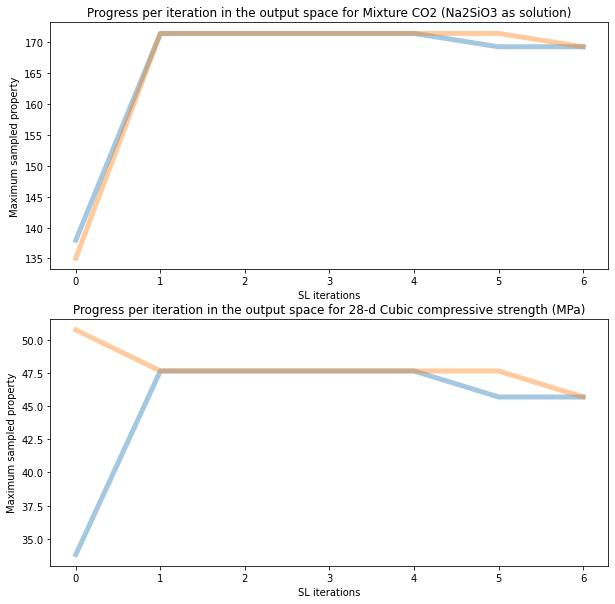

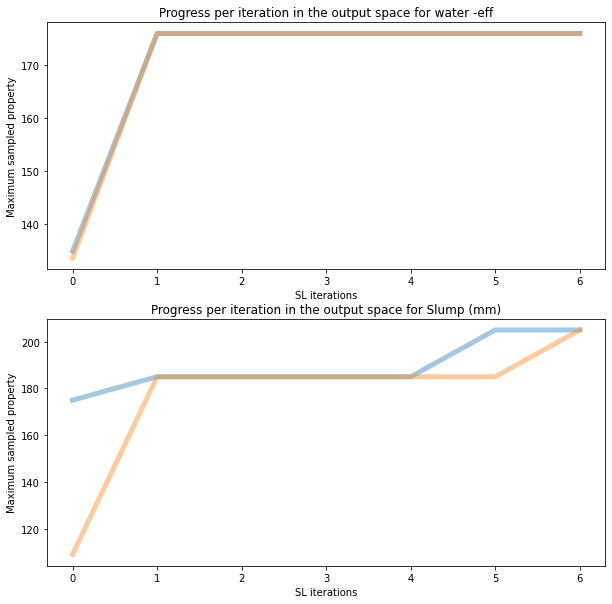

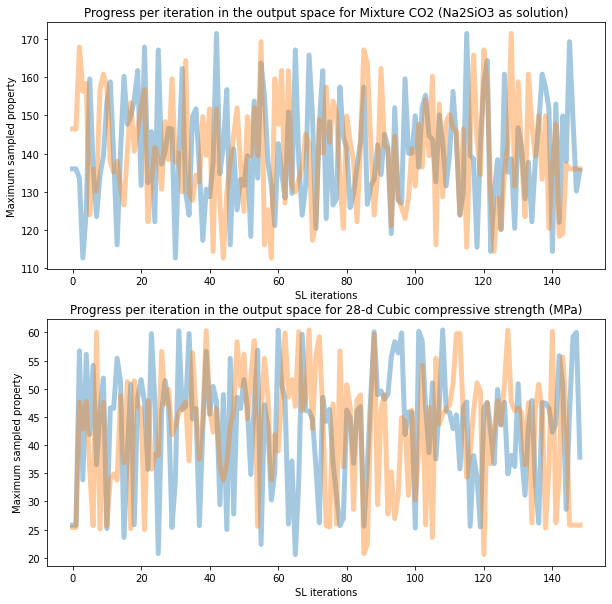

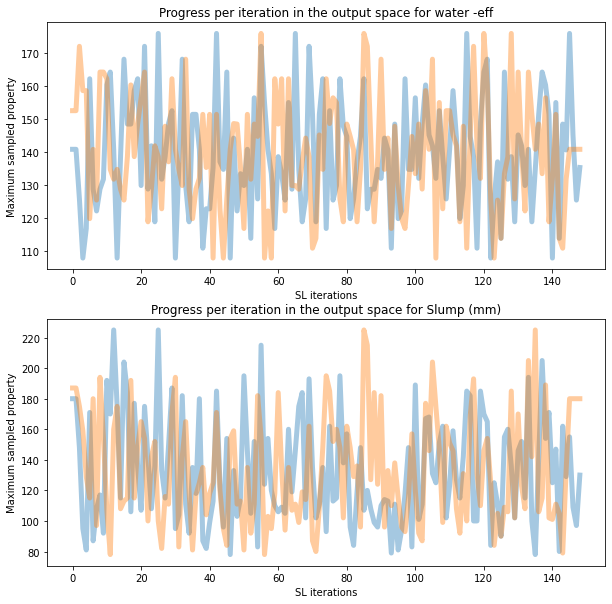

In [34]:
tab